In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

In [5]:
def distr(n, r, plot=False):
    coord = np.zeros((n, 2), dtype='float32')
    for i in range(n):
        coord[i, 0] = r*np.sin(np.pi*((2*i+1)/n))
        coord[i, 1] = r*np.cos(np.pi*((2*i+1)/n))
    if plot:
        plt.scatter(coord[:, 0], coord[:, 1])
        plt.show()
    return coord

In [6]:
def CGR(data=None, seq_base=['A', 'G', 'T', 'C', 'R'], sf=False):
    r = 1.
    base_num = len(seq_base)
    if base_num == 4:
        base_coord = np.array([[1, -1], [-1, -1], [-1, 1], [1, 1]])
        base = {seq_base[i]: base_coord[i] for i in range(base_num)}
    else:
        base_coord = distr(base_num, r)
        base = {seq_base[i]: base_coord[i] for i in range(base_num)}
    # print(base)
    if not sf:
        sf = 1-np.sin(np.pi/base_num)/(np.sin(np.pi/base_num)+np.sin(np.pi*(1/base_num+2*((base_num//4)/base_num))))
    data_len = len(data)
    points = []
    pt = np.zeros(2, dtype='float32')
    for i in range(data_len):
        pt = pt+(base[data[i]]-pt)*sf
        points.append(pt)
    return np.array(points)

In [7]:
# Encoding='FCGR'
Drug_name='CIP'
Bacteria='E.coli'
seed=7
Mode='ToN'

In [8]:
with open(f'results/{Bacteria}/Label_Encoding/{Drug_name}_POS_weight.json', 'r', encoding='utf-8') as f:
    POS_weight = json.load(f)

In [9]:
snp=pd.read_csv(f'/data/HWK/DeepGene/data/{Bacteria}/preprocessed/FCGR/{Bacteria}_{Mode}_{Drug_name}_FCGR_input.csv',sep=',',encoding='utf-8')
snp

,11657_5#1,11657_5#10,11657_5#11,11657_5#12,11657_5#13,11657_5#14,11657_5#15,11657_5#16,11657_5#17,11657_5#18,...,18090_8#29,18090_8#3,18090_8#30,18090_8#33,18090_8#4,18090_8#5,18090_8#6,18090_8#7,18090_8#8,18090_8#84
0,C,N,N,N,N,N,N,C,N,N,...,N,N,C,N,N,N,N,N,N,N
1,C,N,N,N,N,N,N,C,N,N,...,N,N,C,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245138,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
245139,N,N,N,N,N,N,N,N,N,A,...,N,N,N,N,N,N,N,N,N,N
245140,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
245141,N,N,N,N,N,N,N,N,N,N,...,N,C,N,N,N,N,N,N,N,N


In [7]:
# data=np.load(f'/data/HWK/DeepGene/data/{Bacteria}/preprocessed/FCGR/{Bacteria}_{Mode}_FCGR_{Drug_name}.npz',allow_pickle=True)
# X, Y= data['X'].astype('float32'), data['Y'].astype('int32')
# X.shape,Y.shape

Text(0.5, 1.0, '9000-10000')

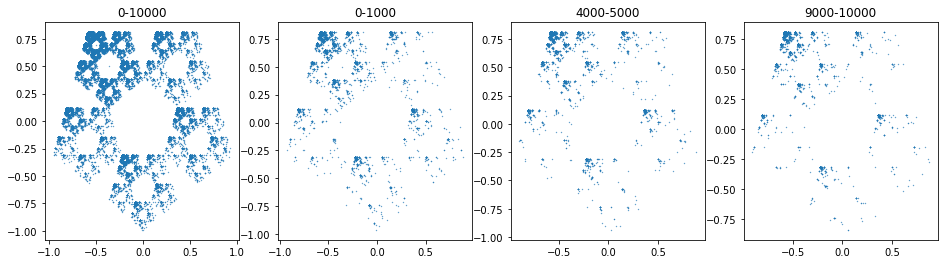

In [13]:
points=CGR(snp['11657_5#12'], seq_base=["A", "C", "T", "G", "N"])
part1=points[:10000]
part2=points[100000:110000]
part3=points[-10000:]
fig,ax=plt.subplots(1,4,figsize=(16,4))
ax[0].scatter(points[:,0],points[:,1],s=0.1)
ax[0].set_title('0-10000')
ax[1].scatter(part1[:,0],part1[:,1],s=0.1)
ax[1].set_title('0-1000')
ax[2].scatter(part2[:,0],part2[:,1],s=0.1)
ax[2].set_title('4000-5000')
ax[3].scatter(part3[:,0],part3[:,1],s=0.1)
ax[3].set_title('9000-10000')

In [9]:
plt.rcParams['figure.figsize'] = (4.48, 4.48)
plt.rcParams['savefig.dpi'] = 50 
if not os.path.exists(f'CGR/raw_{Drug_name}_CGR_outputs'):
    os.mkdir(f'CGR/raw_{Drug_name}_CGR_outputs')
    os.mkdir(f'CGR/raw_{Drug_name}_CGR_outputs/0')
    os.mkdir(f'CGR/raw_{Drug_name}_CGR_outputs/1')
for idx, name in enumerate(snp.columns):
    print(f"{Drug_name}-正在处理第{idx+1}个--{name}...")
    points = CGR(snp[name], seq_base=["A", "C", "T", "G", "N"])
    plt.scatter(points[:, 0], points[:, 1], cmap='bwr', s=0.1)
    plt.axis('off')
    plt.savefig(f'CGR/raw_{Drug_name}_CGR_outputs/{str(Y[idx])}/{name}.png')
    plt.close()
print("Done!")
    

CIP-正在处理第1个--11657_5#1...
CIP-正在处理第2个--11657_5#10...
CIP-正在处理第3个--11657_5#11...
CIP-正在处理第4个--11657_5#12...
CIP-正在处理第5个--11657_5#13...
CIP-正在处理第6个--11657_5#14...
CIP-正在处理第7个--11657_5#15...
CIP-正在处理第8个--11657_5#16...
CIP-正在处理第9个--11657_5#17...
CIP-正在处理第10个--11657_5#18...
CIP-正在处理第11个--11657_5#19...
CIP-正在处理第12个--11657_5#2...
CIP-正在处理第13个--11657_5#20...
CIP-正在处理第14个--11657_5#21...
CIP-正在处理第15个--11657_5#22...
CIP-正在处理第16个--11657_5#23...
CIP-正在处理第17个--11657_5#24...
CIP-正在处理第18个--11657_5#25...
CIP-正在处理第19个--11657_5#26...
CIP-正在处理第20个--11657_5#27...
CIP-正在处理第21个--11657_5#28...
CIP-正在处理第22个--11657_5#29...
CIP-正在处理第23个--11657_5#3...
CIP-正在处理第24个--11657_5#30...
CIP-正在处理第25个--11657_5#31...
CIP-正在处理第26个--11657_5#32...
CIP-正在处理第27个--11657_5#33...
CIP-正在处理第28个--11657_5#34...
CIP-正在处理第29个--11657_5#35...
CIP-正在处理第30个--11657_5#36...
CIP-正在处理第31个--11657_5#37...
CIP-正在处理第32个--11657_5#38...
CIP-正在处理第33个--11657_5#39...
CIP-正在处理第34个--11657_5#4...
CIP-正在处理第35个--11657_5#40...
CIP-正在处理第36个--11657_5#41...
CIP-正

In [7]:
# plt.rcParams['figure.figsize'] = (4.48, 4.48)
# plt.rcParams['savefig.dpi'] = 50 
# POS_weight=np.array(POS_weight)
# index=np.argsort(-POS_weight)[:50]
# POS=np.zeros(len(POS_weight))
# POS[index]=1
# if not os.path.exists(f'/data/HWK/DeepGene/{Drug_name}_CGR_outputs'):
#     os.mkdir(f'/data/HWK/DeepGene/{Drug_name}_CGR_outputs')
#     os.mkdir(f'/data/HWK/DeepGene/{Drug_name}_CGR_outputs/0')
#     os.mkdir(f'/data/HWK/DeepGene/{Drug_name}_CGR_outputs/1')
# for idx, name in enumerate(snp.columns):
#     print(f"{Drug_name}-正在处理第{idx+1}个--{name}...")
#     points = CGR(snp[name], seq_base=["A", "C", "T", "G", "N"])
#     no_N=(snp[name]!='N')
#     color=POS*no_N
#     s=color*10+0.1
#     plt.scatter(points[:, 0], points[:, 1], c=color, cmap='bwr', s=s)
#     plt.axis('off')
#     plt.savefig(f'/data/HWK/DeepGene/{Drug_name}_CGR_outputs/{str(Y[idx])}/{name}.png')
#     plt.close()
    